# Proyecto Final Clase Text Mining & Image Recognition

Integrantes:

* Jose Manuel Lara Rodas
* Leonel Eduardo Contreras González
* Luis Pedro Pérez Gutiérrez

## Problema 2 - Digist Recognizer:

Se importaron las librerías a utilizar.

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import cv2

from keras.models import Sequential
from keras.layers import Dense

from keras.layers import Conv2D
from keras.layers import MaxPool2D
from keras.layers import Flatten


from tensorflow.keras.utils import to_categorical
import tensorflow as tf
import tensorflow.keras as kr

## Análisis Exploratorio y procesamiento del Dataset

Se carga el dataset

In [8]:
dataset= pd.read_csv('train.csv')

Se obtiene la forma del dataset

In [9]:
# Forma del dataset
dataset.shape

(42000, 785)

Se visualiza el dataset

In [10]:
dataset.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Cada imagen es de 28 x 28 pixeles lo que equivale a 784 columnas y 1 columna desgindada "label".

División del dataset por imagen y etiquetas.

In [11]:
# Divir el dataset en dos: Imagenes y Etiquetas

# Dataset solo de imagenes: Dejar solo pixeles, sin la primera columna que indica la etiqueta
imagenes=dataset.iloc[:,1:]

# Dataset solo de etiquetas: la primera columna que indica el digito escrito en las imagenes
etiquetas=dataset.iloc[:,[0]]

In [12]:
imagenes.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Se visualizan los datos de la columna "label" del dataset.

In [13]:
etiquetas.head()

,label
0,1
1,0
2,1
3,4
4,0


#### Ejemplo de interpretación del problema

Se selecciona la imagen que corresponde a la línea 5197.

In [14]:
# Ejemplo de seleccionar solo una imagen (cada fila es una imagen), fila: 5197 (etiqueta: 2)
imagenes.iloc[[5197],:]


,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
5197,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Ejemplo de convertir la fila en una matriz 28x28 (cada imagen es de 28x28 pixeles)
imagenes.iloc[[5197],:].values.reshape(28,28)

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  19, 117, 141, 204, 253, 253,  91,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         32, 187, 252, 252, 253, 252, 252, 115,   0,   0,   0,   0,   0,
          0,   0],
       [  

Se exporta la imagen y se visualiza

In [16]:
# Ejemplo de como obtener la imagen
cv2.imwrite("image.jpg",imagenes.iloc[[5197],:].values.reshape(28,28))

True

<function matplotlib.pyplot.show(close=None, block=None)>

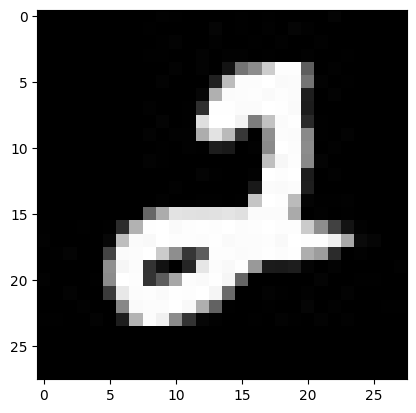

In [28]:
imagen= cv2.imread("image.jpg")
plt.imshow(imagen)
plt.show

## Entrenamiento y Prueba

Se realiza la separación del dataset para poder elaborar los modelos neuronales.

In [17]:
X_train, X_test, y_train, y_test = train_test_split(imagenes, etiquetas, test_size=0.2, random_state=2023)

Creación del modelo ANN

In [18]:
ann = kr.models.Sequential()

#capa de entrada
ann.add(kr.layers.Dense(1000,activation='relu',input_shape=(784,), kernel_initializer='uniform'))

# capa oculta
ann.add(kr.layers.Dense(1000,activation='relu', kernel_initializer='uniform'))

# capa salida
ann.add(kr.layers.Dense(10,activation='softmax'))

# compilacion
ann.compile(loss='sparse_categorical_crossentropy', optimizer='adam',metrics=['accuracy'])

# Ajuste del modelo
ann.fit(X_train,y_train, epochs=10,batch_size=128)

Epoch 1/10
263/263 [==============================] - 14s 47ms/step - loss: 4.0919 - accuracy: 0.8901
Epoch 2/10
263/263 [==============================] - 13s 49ms/step - loss: 0.1921 - accuracy: 0.9572
Epoch 3/10
263/263 [==============================] - 11s 43ms/step - loss: 0.1241 - accuracy: 0.9713
Epoch 4/10
263/263 [==============================] - 10s 38ms/step - loss: 0.1306 - accuracy: 0.9718
Epoch 5/10
263/263 [==============================] - 9s 35ms/step - loss: 0.1084 - accuracy: 0.9745
Epoch 6/10
263/263 [==============================] - 9s 34ms/step - loss: 0.1127 - accuracy: 0.9766
Epoch 7/10
263/263 [==============================] - 9s 34ms/step - loss: 0.1024 - accuracy: 0.9779
Epoch 8/10
263/263 [==============================] - 9s 35ms/step - loss: 0.0939 - accuracy: 0.9801
Epoch 9/10
263/263 [==============================] - 8s 32ms/step - loss: 0.0770 - accuracy: 0.9832
Epoch 10/10
263/263 [==============================] - 9s 34ms/step - loss: 0.0787 - ac

Evaluación modelo ANN

In [19]:
ann_result = ann.evaluate(X_test,y_test)

263/263 [==============================] - 2s 6ms/step - loss: 0.3295 - accuracy: 0.9544


Creación del modelo CNN

In [20]:
cnn = kr.models.Sequential()

#capa de entrada convolucional
cnn.add(kr.layers.Conv2D(filters=64, kernel_size=(3,3), input_shape=(28, 28, 1), activation='relu'))

# primera capa Maxpooling
cnn.add(kr.layers.MaxPool2D(pool_size=(2,2)))

# segunda capa convolucional
cnn.add(kr.layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu'))

# segunda capa Maxpooling
cnn.add(kr.layers.MaxPool2D(pool_size=(2,2)))

# capa Flattening
cnn.add(kr.layers.Flatten())


# capa oculta
cnn.add(kr.layers.Dense(128,activation='relu'))

# capa salida
cnn.add(kr.layers.Dense(10,activation='softmax'))

# compilacion
cnn.compile(loss='sparse_categorical_crossentropy', optimizer='adam',metrics=['accuracy'])



In [21]:
# Ajustar data train y testa para la CNN
X_train_cnn = X_train.values.reshape(-1,28,28,1)
X_test_cnn = X_test.values.reshape(-1,28,28,1)

In [22]:
# Ajuste del modelo
cnn.fit(X_train_cnn,y_train, epochs=10,batch_size=128)

Epoch 1/10
263/263 [==============================] - 25s 91ms/step - loss: 1.4006 - accuracy: 0.8636
Epoch 2/10
263/263 [==============================] - 27s 101ms/step - loss: 0.1042 - accuracy: 0.9677
Epoch 3/10
263/263 [==============================] - 26s 99ms/step - loss: 0.0620 - accuracy: 0.9812
Epoch 4/10
263/263 [==============================] - 25s 95ms/step - loss: 0.0451 - accuracy: 0.9854
Epoch 5/10
263/263 [==============================] - 24s 90ms/step - loss: 0.0356 - accuracy: 0.9886
Epoch 6/10
263/263 [==============================] - 26s 97ms/step - loss: 0.0256 - accuracy: 0.9910
Epoch 7/10
263/263 [==============================] - 25s 94ms/step - loss: 0.0252 - accuracy: 0.9916
Epoch 8/10
263/263 [==============================] - 25s 94ms/step - loss: 0.0220 - accuracy: 0.9923
Epoch 9/10
263/263 [==============================] - 25s 94ms/step - loss: 0.0157 - accuracy: 0.9946
Epoch 10/10
263/263 [==============================] - 24s 93ms/step - loss: 0.02

Evaluación modelo CNN

In [23]:
cnn_result = cnn.evaluate(X_test_cnn,y_test)

263/263 [==============================] - 3s 9ms/step - loss: 0.0874 - accuracy: 0.9814


Comparación de modelos elaborados

Se compararán los modelos generados de **CNN** y **ANN** por medio de las métricas *'Accuracy'* y *'Loss'*.

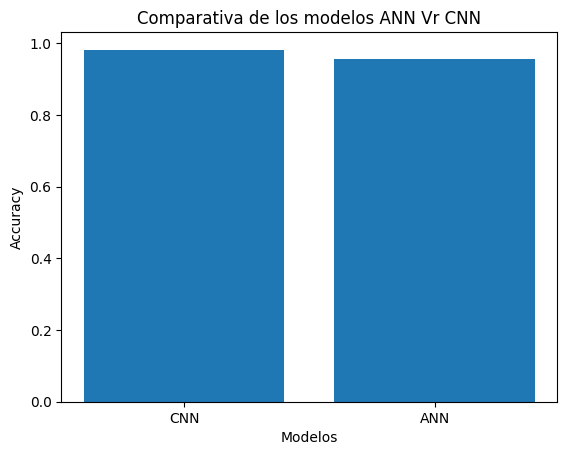

In [24]:
eje_x = ['CNN', 'ANN']

accuracys=[cnn_result[1],ann_result[1]]
eje_y = accuracys

plt.bar(eje_x, eje_y)
plt.ylabel('Accuracy')
plt.xlabel('Modelos')
plt.title('Comparativa de los modelos ANN Vr CNN')
plt.show()

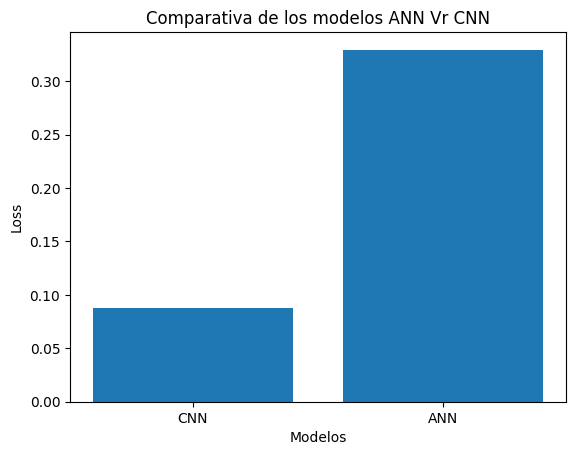

In [25]:
eje_x = ['CNN', 'ANN']

accuracys=[cnn_result[0],ann_result[0]]
eje_y = accuracys

plt.bar(eje_x, eje_y)
plt.ylabel('Loss')
plt.xlabel('Modelos')
plt.title('Comparativa de los modelos ANN Vr CNN')
plt.show()

### Conclusiones:

* Al llevar a cabo la evaluación de los modelos se puede determinar que la mejor precisión la tiene el modelo CNN con un accuracy de 0.9814 contra un accuracy de 0.9544 del modelo ANN
* La perdida de los modelos la más baja es la del modelo CNN con loss de 0.0874 contra un loss de 0.3295 del modelo ANN
* Los modelos generados ofrecen resultados similares pero difieren en la cantidad de tiempo de procesamiento. El modelo ANN se tardó 1m:42 seg., mientras que el modelo CNN se tardó 4min: 10 seg. La elección del modelo a utilizar dependerá de las capacidades de la computadora y de la complejidad de la imagen y tamaño del dataset a procesar.
* Por lo anterior el mejor modelo para la predicción de imagenes es el CNN